In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Titanic=sns.load_dataset("titanic")
Titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_gender=pd.get_dummies(Titanic["sex"])
Titanic=pd.concat([Titanic,df_gender],axis=1)

In [4]:
Titanic.drop(['sex',"survived","adult_male","deck","alone","embark_town","class","alive","who"],axis=1,inplace=True)

In [5]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   female    891 non-null    uint8  
 7   male      891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(2)
memory usage: 43.6+ KB


In [6]:
Titanic.dropna(axis=0,inplace=True)

In [7]:
Titanic.head()

,pclass,age,sibsp,parch,fare,embarked,female,male
0,3,22.0,1,0,7.2500,S,0,1
1,1,38.0,1,0,71.2833,C,1,0
2,3,26.0,0,0,7.9250,S,1,0
3,1,35.0,1,0,53.1000,S,1,0
4,3,35.0,0,0,8.0500,S,0,1


In [8]:
Titanic.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
def scale(x):
  if x=='S':
    return 1
  elif x=='C':
    return 2
  else:
    return 3
Titanic["embarked"]=Titanic["embarked"].map(scale)


In [10]:
Titanic.head(10)

,pclass,age,sibsp,parch,fare,embarked,female,male
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,2,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,1,0,1
6,1,54.0,0,0,51.8625,1,0,1
7,3,2.0,3,1,21.0750,1,0,1
8,3,27.0,0,2,11.1333,1,1,0
9,2,14.0,1,0,30.0708,2,1,0
10,3,4.0,1,1,16.7000,1,1,0


#Checking and Handling outliers

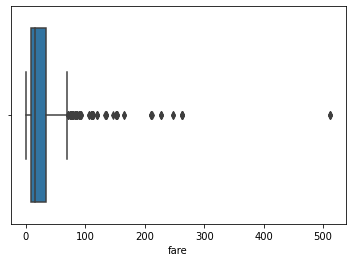

In [11]:
sns.boxplot(x="fare",data=Titanic)

In [12]:
# Titanic["fare"]=Titanic["fare"]<=300
Titanic=Titanic[(Titanic["fare"]<=150)]


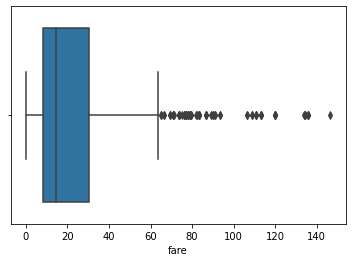

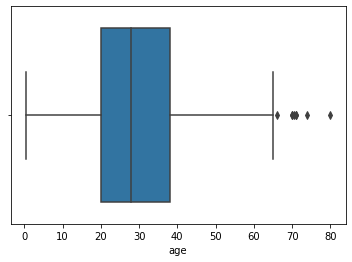

In [13]:
sns.boxplot(x="fare",data=Titanic)
plt.show()
sns.boxplot(x="age",data=Titanic)

In [14]:
X=Titanic.drop(["fare"],axis=1)
y=Titanic['fare']
print(X.shape)
print(y.shape)

(685, 7)
(685,)


#Applying and checking different models

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)


Randon Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)


RandomForestRegressor()

In [60]:
print("Accuracy score: ",rfr.score(X_test,y_test))


Accuracy score:  0.7199168713922333


Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [34]:
predict=model.predict(X_test)

In [61]:
print("Score: ",model.score(X_test,y_test))

Score:  0.5911435932187021


In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predict)

In [62]:
print("Mean Square Error: ",mse)
rmse = np.sqrt(mse)
print("Root mean Square Error: ",rmse)

Mean Square Error:  279.5012924094812
Root mean Square Error:  16.71829214990219


Lasso

In [38]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()

ls.fit(X_train,y_train)

ls.score(X_test, y_test)

0.5682687086650384

Ridge

In [39]:
rd = Ridge()
rd.fit(X_train,y_train)
rd.score(X_test, y_test)

0.5911546863895447

In [40]:
rd2 = Ridge(alpha = 10)

rd2.fit(X_train,y_train)

rd2.score(X_test, y_test)

0.5908402834243085